In [7]:
from qiskit import *
from qiskit.visualization import *

/home/saasha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The multi-control multi-target gate has moved to the circuit library as of 0.14.0 and will not be useable as circuit method anymore. This method will be removed no earlier than 3 months after the release date. You should create the qiskit.circuit.library.MCMT or MCMTVChain circuits and add then to your circuit using append, extend, or compose.
  This is separate from the ipykernel package so we can avoid doing imports until


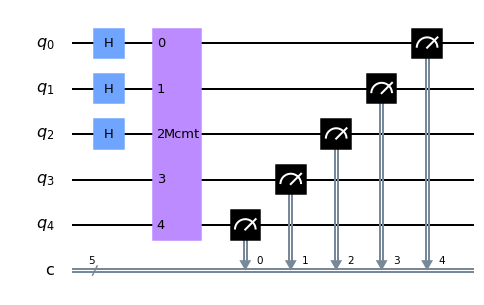

In [12]:
qc = QuantumCircuit(5, 5)
qc.h(range(3))
qc.mcmt('cx', [0, 1, 2], [3, 4])
# qc.mct([0, 1, 2], 3, 3)
# qc.mct([0, 1, 2], 4, 4)
qc.measure([4, 3, 2, 1, 0], range(5))
qc.draw('mpl')

{'00000': 1002, '10000': 1031, '10100': 1041, '11000': 988, '11111': 1066, '00100': 992, '01000': 1063, '01100': 1009}


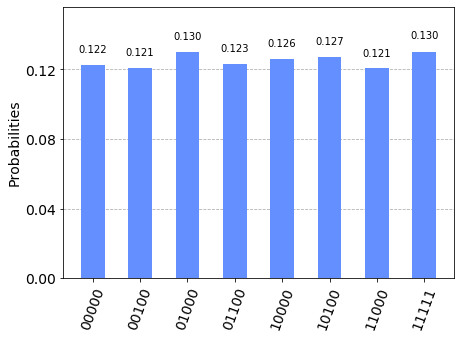

In [13]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 8192, optimization_level = 3).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

In [14]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc)

In [15]:
new_circuit.count_ops()

OrderedDict([('u3', 49), ('cx', 40), ('measure', 5)])